In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### 1. Formulate the statement of the interpolation problem with Cubic Spline [mathematical formula]

We need to find $S_{3}(x)$ such that:
* $S_3(x_i) = f(x_i)$ for $i \in [0, N-1]$
* $S_{3}(x) = \bigcup\limits_{i=0}^{N-1} S_{3, i}(x) \in C_2[a, b]$
* $S_{3, i}(x) = a_{0, i} + a_{1, i}(x - x_i) + a_{2, i}(x - x_i)^2 + a_{3, i}(x - x_i)^3$

### 2. Formulate the functional and differential compatibility conditions [mathematical formula]

Functional:

$S_{3, i} (x_i) - f (x_i) = 0$ 
<br>
$S_{3, i} (x_{i+1}) - f (x_{i+1}) = 0$

Differential:

$S_{3, i}^{ (2) } (x_i) - f^{(2)} (x_i) = 0$ 
<br>
$S_{3, i}^{ (2) } (x_{i+1}) - f^{(2)} (x_{i+1}) = 0$

### 3. Formulate stitching conditions [mathematical formula]

$S_{3, i - 1}^{(1)} (x_i) = S_{3, i}^{(1)} (x_{i})$ 











### 4. Justify why these conditions provide you with the required smoothness [thesis text, no more than 500 characters]

Условия сшивки гарантируют непрерывность, условия дифференциального согласования гарантируют гладкость, то что у нас кубический полином гарантирует дважды диффренцируемость

### 5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes). [Mathematical formulas derivation. Detailed, with clear transitions]

Подставляем формулу $S_{3, i}(x) = a_{0, i} + a_{1, i}(x - x_i) + a_{2, i}(x - x_i)^2 + a_{3, i}(x - x_i)^3$ в формулы из 2 задания и туда подставляем $x_i$ и $x_{i+1}$, получаем:

$a_{0,i} = f(x_i)$ <br>
$a_{0,i} + a_{1,i}(x_{i+1} - x_i) + a_{2,i}(x_{i+1} - x_i)^2 + a_{3,i}(x_{i+1} - x_i)^3 - f(x_{i+1}) = 0$ <br>
$2a_{2,i} = f^{(2)} (x_{i})$ <br>
$2a_{2,i} + 6a_{3,i}(x_{i+1} - x_i) = f^{(2)} (x_{i+1})$

Упрощаем ($f^{(2)} (x_{i}) = m_i, x_{i+1} - x_i = h_{i+1}, \Delta f_i = f_{i+1} - f_i$) и подставляем коэффиценты в выражение, получаем:

$S_{3, i}(x) = f(x_i) + (\frac{\Delta f_i}{h_{i+1}} - \frac{h_{i+1}}{2}m_i - \frac{h_{i+1}}{6}\Delta m_i)(x - x_i) + \frac{m_i}{2}(x - x_i)^2 + \frac{\Delta m_i}{6h_{i+1}}(x - x_i)^3$

Это выражение подставляем в формулу из 3 задания, получаем:

$\frac{\Delta f_{i-1}}{h_{i}} - \frac{h_{i}}{2}m_{i-1} - \frac{h_{i}}{6}\Delta m_{i-1} + m_i h_i + \frac{\Delta m_{i-1}h_i}{2} = \frac{\Delta f_i}{h_{i+1}} - \frac{h_{i+1}}{2}m_i - \frac{h_{i+1}}{6}\Delta m_i$

Расписываем $\Delta m_i = m_{i+1} - m_i$ и упрощаем, получаем:

$ \frac{m_{i-1} h_i}{6} + \frac{h_i + h_{i+1}}{3}m_i + \frac{h_{i+1}}{6}m_{i+1} = \frac{\Delta f_i}{h_{i+1}} - \frac{\Delta f_{i-1}}{h_{i}}$


### 6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]

\begin{bmatrix}
\frac{h_1+h_2}{3} & \frac{h_2}{6}     & 0                 & \dots & 0   & 0  & 0 
& \frac{\Delta f_1}{h_2} - \frac{\Delta f_0}{h_1} \\ 
\frac{h_2}{6}     & \frac{h_2+h_3}{3} & \frac{h_3}{6}     & \dots & 0   & 0  & 0   
& \frac{\Delta f_2}{h_3} - \frac{\Delta f_1}{h_2} \\
\dots             & \dots             & \dots             & \dots & \dots & \dots & \dots & \dots \\
0 & \dots & \frac{h_i}{6} & \frac{h_i+h_{i+1}}{3} & \frac{h_{i+1}}{6} & \dots  & 0
& \frac{\Delta f_i}{h_{i+1}} - \frac{\Delta f_{i-1}}{h_i} \\
\dots             & \dots             & \dots             & \dots & \dots & \dots & \dots & \dots \\
0                 & 0        & 0         & 0                 & \dots & \frac{h_{n-1}}{6} & \frac{h_{n-1}+h_n}{3}
& \frac{\Delta f_{n-1}}{h_n} - \frac{\Delta f_{n-2}}{h_{n-1}},
\end{bmatrix}

### 7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. [Text, no more than 200 characters]

В данной системе n - 1 уравнений (i от 1 до n - 1), а неизвестных n + 1 (m от 0 до n). Поэтому добавим условия $m_0 = 0$ и $m_n = 0$ 

### 8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]

Продемонстрирую на примере первых 2 строк матрицы А из задания 6

Шаг 1: Делим первую строку на $A_{11} = \frac{h_1 + h_2}{3}$ чтобы получить там 1. 

Получаем для первой строки:    
\begin{bmatrix}
    1 & \frac{h_2}{2(h_1+h_2)} & 0 & \dots & 0 & (\frac{\Delta f_1}{h_2} - \frac{\Delta f_0}{h_1})\frac{3}{h_1+h_2}
\end{bmatrix}

Получившиеся значения во 2 и в последней колонке обозначим $P_1$ и $Q_1$ соответственно.

Шаг 2: Вычитаем из второй строки домноженную на $A_{21} = \frac{h_2}{6}$ первую строку чтобы получить ноль в $A_{21}$. Первая строка не меняется.

Получаем для второй строки:
\begin{bmatrix}
    0 & \frac{-h_2^2 + 4(h_1+h_2)(h_2+h_3)}{12(h_1+h_2)} & \frac{h_3}{6} & \dots & 0 & \frac{2(\Delta f_2 h_2 - \Delta f_1 h_3)h_1(h_1+h_2) - (\Delta f_1 h_1 - \Delta f_0 h_2)h_2 h_3}{2 h_1 h_2 h_3 (h_1 + h_2)}
\end{bmatrix}

Шаг 3: Делим вторую строку на $A_{22} = \frac{-h_2^2 + 4(h_1+h_2)(h_2+h_3)}{12(h_1+h_2)}$ чтобы получить 1 в $A_{22}$. Первая строка не меняется.

Получаем для второй строки:
\begin{bmatrix}
    0 & 1 & \frac{2h_3(h_1+h_2)}{4(h_2+h_3)(h_1+h_2)-h_2} & \dots & 0 & \frac{6 h_2^2 h_3 \Delta f_0 + 12(h_1+h_2) \Delta f_2 + h_2 h_1 - 12(h_1+h_2)\Delta f_1 h_1 h_3 - h_1 h_2 h_3 6 \Delta f_1}{h_1 h_2 h_3 (4(h_2+h_3)(h_1 + h_2) - h_2^2)}
\end{bmatrix}

Получившиеся значения в 3 и в последней колонке обозначим $P_2$ и $Q_2$ соответственно.

### 9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]

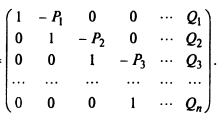

где forward pass:

$P_1 = -\frac{h_2}{2(h_1 + h_2)}$    

$Q_1 = 3(\frac{\Delta f_1}{h_2} - \frac{\Delta f_0}{h_1})/(h_1 + h_2)$

$P_i = \frac{h_{i+1}}{(-2(h_i + h_{i+1}) - h_iP_{i-1})}$

$Q_i = \frac{h_iQ_{i-1} - 6\frac{\Delta f_i}{h_{i+1}} + 6\frac{\Delta f_{i-1}}{h_i}}{2(h_{i+1} + h_i)- h_iP_{i-1}}$

backward pass:

$x_n = Q_n$

$x_{i} = P_{i}x_{i+1} + Q_{i}$

### 10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code]

In [ ]:
def forward_pass():
    #Посчитать P и Q 
    pass

def backward_pass():
    #На основе посчитаных в предыдущем прогоне P и Q посчитать x
    pass

### 11. Derive formula of Cubic Spline method error [Mathematical formulas]

Если f 4 раза дифференцируема, то можем посчитать по такой формуле:

$max|f^p - S_3^p| \leqslant \mu_4 h^{4-p}$

Иначе ничего не знаем(

### 12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]

Forward pass - $O(n)$, backward pass - $O(n)$ 

In summary - $O(n)$

### Congrats!